In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
!pip install prince
import prince

In [3]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Hepatitis.csv"
Hepatitis=pd.read_csv(url, sep=";", encoding="latin1", na_values=" ", decimal=",")
Hepatitis

,Clase,Edad,Sexo,Esteroides,Antivirales,Fatiga,Hombrestar,Anorexia,Higado Grande,Cirrosis,Bazo palpable,Ara¤as,Ascites,Varices,Billirubina,Fosfato,SGOT,Albumina,Protina,Histologia
0,Vivo,30,Mujer,No,S¡,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,1.0,85,18,4.0,0,No
1,Vivo,50,Hombre,No,S¡,No,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,0.9,135,42,3.5,0,No
2,Vivo,78,Hombre,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,0.7,96,32,4.0,0,No
3,Vivo,31,Hombre,NaN,No,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,0.7,46,52,4.0,80,No
4,Vivo,34,Hombre,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,1.0,0,200,4.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Muerto,46,Hombre,S¡,S¡,No,No,No,S¡,S¡,S¡,No,No,No,7.6,0,242,3.3,50,S¡
148,Vivo,44,Hombre,S¡,S¡,No,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,0.9,126,142,4.3,0,S¡
149,Vivo,61,Hombre,No,S¡,No,No,S¡,No,No,S¡,No,S¡,S¡,0.8,75,20,4.1,0,S¡
150,Vivo,53,Mujer,No,S¡,No,S¡,S¡,S¡,S¡,No,No,S¡,No,1.5,81,19,4.1,48,S¡


In [6]:
# Eliminar datos faltantes, 12 filas en total
Hepa=Hepatitis.dropna(axis=0)
Hepa

,Clase,Edad,Sexo,Esteroides,Antivirales,Fatiga,Hombrestar,Anorexia,Higado Grande,Cirrosis,Bazo palpable,Ara¤as,Ascites,Varices,Billirubina,Fosfato,SGOT,Albumina,Protina,Histologia
0,Vivo,30,Mujer,No,S¡,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,1.0,85,18,4.0,0,No
1,Vivo,50,Hombre,No,S¡,No,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,0.9,135,42,3.5,0,No
2,Vivo,78,Hombre,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,0.7,96,32,4.0,0,No
4,Vivo,34,Hombre,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,1.0,0,200,4.0,0,No
5,Vivo,34,Hombre,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,0.9,95,28,4.0,75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Muerto,46,Hombre,S¡,S¡,No,No,No,S¡,S¡,S¡,No,No,No,7.6,0,242,3.3,50,S¡
148,Vivo,44,Hombre,S¡,S¡,No,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,0.9,126,142,4.3,0,S¡
149,Vivo,61,Hombre,No,S¡,No,No,S¡,No,No,S¡,No,S¡,S¡,0.8,75,20,4.1,0,S¡
150,Vivo,53,Mujer,No,S¡,No,S¡,S¡,S¡,S¡,No,No,S¡,No,1.5,81,19,4.1,48,S¡


In [7]:
## Extraigo las cuantitativas
cuanti=Hepa.select_dtypes(exclude=["object"])
cuanti

,Edad,Billirubina,Fosfato,SGOT,Albumina,Protina
0,30,1.0,85,18,4.0,0
1,50,0.9,135,42,3.5,0
2,78,0.7,96,32,4.0,0
4,34,1.0,0,200,4.0,0
5,34,0.9,95,28,4.0,75
...,...,...,...,...,...,...
147,46,7.6,0,242,3.3,50
148,44,0.9,126,142,4.3,0
149,61,0.8,75,20,4.1,0
150,53,1.5,81,19,4.1,48


In [8]:
## 
cuali=Hepa.select_dtypes(include=["object"])
cuali

,Clase,Sexo,Esteroides,Antivirales,Fatiga,Hombrestar,Anorexia,Higado Grande,Cirrosis,Bazo palpable,Ara¤as,Ascites,Varices,Histologia
0,Vivo,Mujer,No,S¡,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,No
1,Vivo,Hombre,No,S¡,No,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,No
2,Vivo,Hombre,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,No
4,Vivo,Hombre,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,No
5,Vivo,Hombre,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,S¡,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Muerto,Hombre,S¡,S¡,No,No,No,S¡,S¡,S¡,No,No,No,S¡
148,Vivo,Hombre,S¡,S¡,No,S¡,S¡,S¡,No,S¡,S¡,S¡,S¡,S¡
149,Vivo,Hombre,No,S¡,No,No,S¡,No,No,S¡,No,S¡,S¡,S¡
150,Vivo,Mujer,No,S¡,No,S¡,S¡,S¡,S¡,No,No,S¡,No,S¡


In [9]:
## Estandarizar las cuanti
escala=StandardScaler(with_mean=True, with_std=True)
escala.fit(cuanti)
datosestan=escala.transform(cuanti)

In [10]:
## Realizo el ACP
pca=PCA(0.9)
pca.fit(datosestan)  ## Ajusto el PCA (valores, vectpores, varianza)
nuevosACP=pca.transform(datosestan)
pca.explained_variance_ratio_  ## Como el ACP es tan malo, se podria trabajar con los estandarizados

array([0.26549301, 0.20652426, 0.16544834, 0.14272976, 0.11725358,
       0.10255104])

In [12]:
acm=prince.MCA(n_components=13)
acm.fit(cuali)
nuevosACM=acm.fit_transform(cuali)
x=list(range(len(acm.explained_inertia_)))
y=np.cumsum(acm.explained_inertia_)
fig=px.line(x=x, y=y)
fig.show()

In [13]:
### Unir ACM y ACP
nuevos1=pd.DataFrame(nuevosACP, index=Hepa.index)
nuevos2=pd.DataFrame(nuevosACM, index=Hepa.index)
acm_acp=pd.concat([nuevos1, nuevos2], axis=1)
acm_acp

,0,1,2,3,4,5,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.460533,-0.784851,-0.714697,-0.665097,-0.996275,-0.207967,-0.492270,0.452942,0.209122,0.221412,-0.170459,0.257940,-0.635378,-0.108743,0.455963,-0.068216,0.272442,0.267752,0.006547
1,0.314068,-0.410476,0.881920,-0.942754,-0.615849,-0.592154,-0.268731,0.319746,0.043700,-0.266221,-0.296798,-0.075721,-0.092038,-0.266222,0.084309,-0.151082,0.117402,0.424781,-0.249542
2,0.562026,-0.864619,2.817872,0.169753,-0.570692,-1.447306,-0.385914,-0.192405,-0.129515,0.141922,-0.046882,-0.155843,0.110306,-0.221871,-0.161844,-0.058398,-0.063071,0.171190,-0.098983
4,0.522679,-0.641164,-1.522604,0.820371,0.196378,-1.458614,-0.581273,-0.306679,-0.012926,0.056374,-0.023227,-0.171121,0.000819,-0.021859,0.148964,-0.032570,0.022784,-0.012335,0.026026
5,-1.314344,0.287883,-0.064763,-0.002556,0.154585,0.591535,-0.581273,-0.306679,-0.012926,0.056374,-0.023227,-0.171121,0.000819,-0.021859,0.148964,-0.032570,0.022784,-0.012335,0.026026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,3.494551,1.853100,-1.006443,3.626541,-1.349952,1.541035,1.135482,-0.670041,-0.396913,0.103152,0.281680,-0.126369,-0.183178,0.159838,0.262827,-0.051465,0.122290,0.174274,-0.075735
148,0.377987,0.287882,-0.020185,-0.582097,-0.403975,-1.386547,-0.106601,-0.095919,0.213827,-0.040110,0.097200,-0.221163,-0.045499,-0.085421,-0.517418,0.068497,-0.071767,-0.056148,0.183640
149,0.104833,-1.014637,1.522062,0.090094,-0.764283,-1.020948,0.423300,0.549889,0.241727,-0.357985,-0.132860,-0.223915,-0.261745,-0.144653,-0.110683,0.137702,-0.180737,0.063835,-0.133554
150,-0.387639,-0.117222,1.140625,0.524533,-0.448078,0.064553,0.395742,-0.027668,0.529061,0.700541,-0.171788,0.655402,-0.301461,0.424600,-0.052978,-0.193211,-0.189417,0.241099,-0.369740


In [16]:
def agnes_coef(bas,metodo,metrica):
    '''
    Función que permite determinar el coeficiente de aglomeración entre varias métricas y métodos
    Datos de entrada:
        Obligatorios:
            base: se recomienda la base ya normalizada y que solo contenga variables cuantitativas.
            método: contiene la lista de métodos que se usara a comparar.
            métrica: contiene la lista de las métricas que se usara para comparar
    Datos de salida:
        devolverá un Dataframe que contendrá el cálculo de cada coeficiente de aglomeración, donde los métodos son 
        las columnas y las métricas los índices. Dado el caso que el resultado sea -1 es que la combinación entre 
        métrica y método genera error.
    '''
    bas=pd.DataFrame(bas)
    bas_resul=pd.DataFrame(columns=metrica,index=metodo)
    for i in range(len(metodo)):
        for j in range(len(metrica)):
            try:
                enla=sch.linkage(bas, method=metodo[i], metric=metrica[j])
                enlas=pd.DataFrame(enla)
                a1=enlas[enlas[0].isin(bas.index)]
                b1=enlas[enlas[1].isin(bas.index)]
                resul=sum(max(enlas[2])-pd.concat([a1,b1],axis=0)[2])/(max(enlas[2])*bas.shape[0])
                bas_resul.iloc[i,j]=resul
            except ValueError:
                bas_resul.iloc[i,j]=-1
            
    return bas_resul

In [17]:
agnes_coef(acm_acp,["ward","complete","single", "average","centroid", "median"],
           ["braycurtis", "canberra", "chebyshev", 
          "cityblock", "correlation", "cosine", "euclidean", "jensenshannon", "mahalanobis"])

,braycurtis,canberra,chebyshev,cityblock,correlation,cosine,euclidean,jensenshannon,mahalanobis
ward,-1,-1,-1,-1,-1,-1,0.902835,-1,-1
complete,0.8379,0.601506,0.881133,0.788353,0.877539,0.880274,0.835474,-1,0.693919
single,0.432495,0.41434,0.777049,0.693015,0.626618,0.613295,0.735018,-1,0.551985
average,0.670093,0.508826,0.849126,0.750799,0.806827,0.80983,0.802252,-1,0.609069
centroid,-1,-1,-1,-1,-1,-1,0.798443,-1,-1
median,-1,-1,-1,-1,-1,-1,0.777568,-1,-1


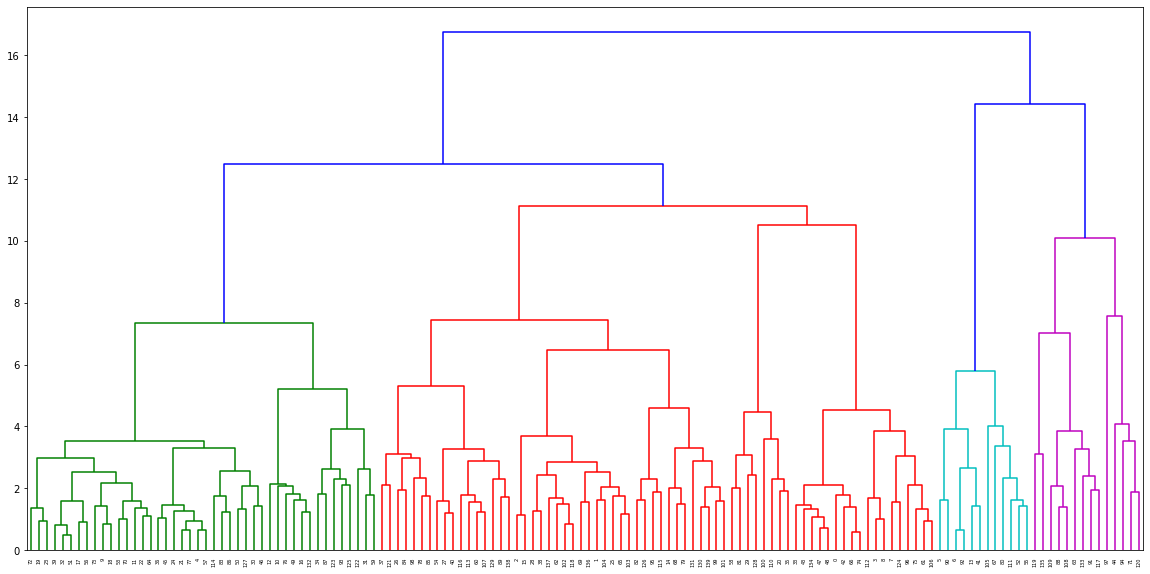

In [18]:
## Dendrograma
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(acm_acp, method='ward',metric="euclidean"))

In [19]:
### Realizo el corte
enlace=sch.linkage(acm_acp, method='ward',metric="euclidean")
corte=cluster.hierarchy.cut_tree(enlace, n_clusters=4)
corte[:,0]

array([0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0,
       3, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 1, 0,
       0, 2, 0, 0, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3,
       0, 2, 0, 0, 1, 0, 0, 3, 0, 3, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 3, 0, 3, 0, 0, 0, 0])

In [20]:
### Adiciono la variable grupo a la base cuali y cuanti
cuanti["Grupo"]=corte[:,0]
cuali["Grupo"]=corte[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
cuanti.groupby("Grupo").size()

Grupo
0    70
1    44
2    12
3    14
dtype: int64

In [21]:
fig=px.violin(cuanti, y=cuanti.Albumina, color=cuanti.Grupo)
fig.show()

In [24]:
### Tablas ANOVA para las cuanti (Problema hay atipicos)
a=cuanti.columns
pvalor=[]
for i in range(len(a)):
  b,c=f_oneway(cuanti[cuanti["Grupo"]==0][a[i]], cuanti[cuanti["Grupo"]==1][a[i]],
               cuanti[cuanti["Grupo"]==2][a[i]],cuanti[cuanti["Grupo"]==3][a[i]])
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

,Pvalue
Albumina,3.821126e-41
Billirubina,8.301182e-23
Protina,4.253325e-22
SGOT,6.714753e-08
Edad,9.840384e-05
Fosfato,1.885038e-01


In [29]:
### Kruskal Wallis por la presencia de atipicos
a=cuanti.columns
pvalor=[]
for i in range(len(a)):
  b,c=kruskal(cuanti[cuanti["Grupo"]==0][a[i]], cuanti[cuanti["Grupo"]==1][a[i]],
               cuanti[cuanti["Grupo"]==2][a[i]],cuanti[cuanti["Grupo"]==3][a[i]])
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

,Pvalue
Protina,4.531416e-16
Albumina,2.056279e-11
Billirubina,8.957760e-09
Edad,4.603116e-05
SGOT,2.902354e-03
Fosfato,3.186522e-01


In [27]:
fig=px.violin(cuanti, y=cuanti.Albumina, color=cuanti.Grupo)
fig.show()

In [28]:
fig=px.violin(cuanti, y=cuanti.Billirubina, color=cuanti.Grupo)
fig.show()

In [31]:
### Chi cuadrados con las cuali
a=cuali.columns
pvalor=[]
for i in range(len(a)):
  tabla=pd.crosstab(cuali[a[i]], cuali["Grupo"])
  b,c,d,e=chi2_contingency(tabla)
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

,Pvalue
Clase,0.000068
Ara¤as,0.000969
Hombrestar,0.001127
Histologia,0.003077
Fatiga,0.005807
Antivirales,0.006761
Ascites,0.012515
Anorexia,0.027222
Bazo palpable,0.092308
Varices,0.094228


In [32]:
tabla=cuali.groupby(["Clase", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla.Clase, y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

In [37]:
tabla=cuali.groupby(["Ara¤as", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, color="Ara¤as", y=tabla.Conteo, x=tabla.Grupo,)
fig.show()

In [ ]:
### Describir las variables de un cluster jerarquico.